# CME 193 - Lecture 2

This class we will cover
1. Basics of creating classes and objects
2. Basics of NumPy
3. Some plotting

## Bank Account example to illustrate Classes and Objects

In [1]:
debits = []
credits = []

In [2]:
def add_to_debits(value):
    global debits
    debits += [value]

In [3]:
def add_to_credits(value):
    global credits
    credits += [value]

In [4]:
add_to_credits(1000)
add_to_debits(10)
add_to_debits(15)
add_to_debits(100)

In [5]:
credits

[1000]

In [6]:
debits

[10, 15, 100]

In [7]:
def total_value():
    global debits
    global credits
    total = 0
    for val in debits:
        total -= val
    for val in credits:
        total += val
    return total

In [8]:
total_value()

875

## Lets use Classes and Objects

In [9]:
class Account:
    accounts = []
    def __init__(s):
        s.accounts += [s]
        s.debits = []
        s.credits = []
    
    def add_to_debits(self, value):
        if value < self.total_value():
            self.debits += [value]
            return True
        else:
            print("Insufficient funds")
            return False
    
    def add_to_credits(self, value):
        self.credits += [value]
    
    def total_value(self):
        total = 0
        for val in self.debits:
            total -= val
        for val in self.credits:
            total += val
        return total
    
    def transfer(self, other, value):
        if value > 0:
            if self.add_to_debits(value):
                other.add_to_credits(value)
        else:
            if other.add_to_debits(-value):
                self.add_to_credits(-value)

In [10]:
acc1 = Account()
acc1.add_to_credits(2000)
acc1.add_to_debits(10)
acc1.add_to_debits(15)
acc1.add_to_debits(100)
acc1.total_value()

1875

In [11]:
acc2 = Account()
acc2.add_to_credits(1000)
acc2.add_to_debits(10)
acc2.add_to_debits(15)
acc2.add_to_debits(100)
acc2.total_value()

875

In [12]:
acc2.transfer(acc1, 1000)

Insufficient funds


In [13]:
acc2.transfer(acc1, 200)

In [14]:
acc2.total_value()

675

In [15]:
acc1.total_value()

2075

In [16]:
Account.accounts

[<__main__.Account at 0x2f308abfa08>, <__main__.Account at 0x2f308b62748>]

## Exercise 1

### Add more functionality to the account class

1. Add a check before debits to ensure funds are available

2. Add a `transfer` function to your account class, which transfers money form one account to another.It should add to the debits of one account and to the credits of the other.

It's added above.

## Example: Rational Numbers

Let's continue with our example of rational numbers (fractions), that is, numbers of the form
$$r = \frac{p}{q}$$
where $p$ and $q$ are integers. Let's make it support addition using the formula:
$$ \frac{p_1}{q_1} + \frac{p_2}{q_2} = \frac{p_1 q_2 + p_2 q_1}{q_1 q_2}$$

In [17]:
import math


class Rational:
    def __init__(self, p, q=1):
        
        if q == 0:
            raise ValueError('Denominator must not be zero')
        if not isinstance(p, int):
            raise TypeError('Numerator must be an integer')
        if not isinstance(q, int):
            raise TypeError('Denominator must be an integer')
            
        g = math.gcd(p, q)
        
        self.p = p // g
        self.q = q // g
        
    # method to convert rational to float
    def __float__(self):
        return float(self.p) / float(self.q)
        
    # method to convert rational to string for printing
    def __str__(self):
        return '%d / %d' % (self.p, self.q)
        
    # method to add two rationals - interprets self + other
    def __add__(self, other):
        if isinstance(other, Rational):
            return Rational(self.p * other.q + other.p * self.q, self.q * other.q)
        # -- if it's an integer
        elif isinstance(other, int):
            return Rational(self.p + other * self.q, self.q)
        # -- otherwise, assume it will be a float
        return float(self) + float(other)
        
    def __radd__(self, other):  # interprets other + self
        return self + other  # addition commutes
    
    # subtraction
    def __sub__(self, other):
        if isinstance(other, Rational):
            return self + Rational(-other.p, other.q)
        elif isinstance(other, int):
            return self + (-other)
        else:
            return NotImplemented
    
    # multiplication
    def __mul__(self, other):
        if isinstance(other, Rational):
            return Rational(self.p * other.p, self.q * other.q)
        elif isinstance(other, int):
            return Rational(self.p * other, self.q)
        else:
            return NotImplemented
    
    # division
    def __truediv__(self, other):
        if isinstance(other, Rational):
            return Rational(self.p * other.q, self.q * other.p)
        elif isinstance(other, int):
            return Rational(self.p, self.q * other)
        else:
            return NotImplemented
    
    # less than
    def __lt__(self, other):
        if isinstance(other, Rational):
            return self.p / self.q < other.p / other.q
        elif isinstance(other, int):
            return self.p / self.q < other
        else:
            return NotImplemented

    def __repr__(self):
        return self.__str__()
    
    def __rmul__(self, other):
        return self * other
    

In [18]:
r1 = Rational(3,4)
print(r1)
r2 = Rational(5,2)
print(r2)

3 / 4
5 / 2


In [19]:
r1

3 / 4

In [20]:
print(r1 + r2)

13 / 4


In [21]:
print(float(r1 + r2))

3.25


In [22]:
# left add
print(r1 + 5)

23 / 4


In [23]:
# right add
print(5 + r1)

23 / 4


# Exercise 2

### Add more operations to `Rational`
You can read about the available operations that you can overload [here](https://docs.python.org/3.7/reference/datamodel.html#emulating-numeric-types)

Add the following operations to the `Radical` class:
* `*` - use `__mul__`
* `\` - use `__truediv__`
* `-` - use `__sub__`

You only need to define these operations between two `Rational` types - use an `if isinstance(other, Rational):` block.

Make a few examples to convince yourself that this works.

Added above.

In [24]:
r3 = Rational(2, 5)
print(r3)
r4 = Rational(2, 10)
print(r4)

2 / 5
1 / 5


In [25]:
print(r4 - r3)
print(float(r4 - r3))

-1 / 5
-0.2


In [26]:
print(r3 - 1)

-3 / 5


In [27]:
print(r3 / 2)

1 / 5


In [28]:
print(r3 / r4)

2 / 1


In [29]:
print(2 * r3)

4 / 5


In [30]:
print(r3 * 2)

4 / 5


In [31]:
print(r3 * r4)

2 / 25


# Exercise 3
## Square root of rationals using the Babylonian method

Implement the [Babylonian Method](https://en.wikipedia.org/wiki/Methods_of_computing_square_roots#Babylonian_method) for computing the square root of a number $S$.

In [32]:
def babylonian(S, num_iters=5):
    """
    Fuction to calculate the square root using the Babylonian method.
    
    Arguments:
        S : number to be square root'ed; non negative real number.
        num_iters : number of iterations of Babylonian algorithm; 
                    positive integer.
    """
    
    # Validate input arguments
    if not isinstance(S, (int, float, Rational)):
        raise TypeError("The value must be an integer, float or Rational.")
    if num_iters <= 0:
        raise ValueError("The number of iterations must be positive.")
    if not isinstance(num_iters, int):
        raise TypeError("The number of iterations must be an integer.")
    
    # Necessary to convert S rational into float
    S = float(S)
    
    if S < 0:
        raise ValueError("The value must be non negative.")    
    
    # Babylonian method
    x = S / 2  # initial guess
    for i in range(num_iters):
        x = (x + S / x) / 2
    return x

In [33]:
help(babylonian)

Help on function babylonian in module __main__:

babylonian(S, num_iters=5)
    Fuction to calculate the square root using the Babylonian method.
    
    Arguments:
        S : number to be square root'ed; non negative real number.
        num_iters : number of iterations of Babylonian algorithm; 
                    positive integer.



In [34]:
babylonian(24)

4.898979485575103

In [35]:
babylonian(25, 6)

5.0

In [36]:
babylonian(127.55)

11.294043102421222

In [37]:
math.sqrt(24)

4.898979485566356

In [38]:
babylonian(Rational(24))

4.898979485575103

# NumPy

In [1]:
import math as m
import numpy as np

In [12]:
m.sin(5)

-0.9589242746631385

In [2]:
x = np.array([[0, 1], [1, 5]])
x

array([[0, 1],
       [1, 5]])

In [4]:
y = np.array([[4, 0], [0, 4]])
y

array([[4, 0],
       [0, 4]])

In [5]:
x + y

array([[4, 1],
       [1, 9]])

In [6]:
x ** 2

array([[ 0,  1],
       [ 1, 25]], dtype=int32)

In [7]:
x @ y  # matrix multiplication

array([[ 0,  4],
       [ 4, 20]])

In [8]:
np.sum(x)

7

In [9]:
%%timeit
x = np.random.rand(10000)
y = np.random.rand(10000)
z = 0
for i in range(10000):
    z += x[i] * y[i]

5.25 ms ± 317 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
%%timeit
x = np.random.rand(10000)
y = np.random.rand(10000)
z = np.dot(x, y)

192 µs ± 4.67 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## NumPy functions for creating arrays

In [14]:
X = np.zeros((10,10))
X

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [15]:
X.shape

(10, 10)

In [17]:
Y = np.ones((10,10))
Y

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [18]:
2*Y + 3

array([[5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.]])

In [20]:
R = np.random.rand(5,5)
R

array([[0.04205451, 0.0974169 , 0.27404319, 0.43063927, 0.34738275],
       [0.06853832, 0.69728161, 0.93875269, 0.39578664, 0.56821876],
       [0.91981613, 0.82713215, 0.58500318, 0.24473728, 0.35012877],
       [0.58735525, 0.15701208, 0.30394617, 0.61135024, 0.90412951],
       [0.38099411, 0.51851293, 0.50636345, 0.95809002, 0.25700971]])

In [22]:
Rn = np.random.randn(5,5)
Rn

array([[ 0.54726549, -1.08770072,  0.88097708, -0.78885863,  1.75961129],
       [-0.44153183,  0.56152914, -0.59470371,  0.16202678, -1.66335771],
       [-1.93086989, -1.68074394, -1.15738981, -2.01012007,  0.97381759],
       [-0.77304597, -0.6387274 ,  1.23400934, -0.72969635, -0.93799571],
       [-0.62011243, -0.61847048,  0.33559256, -2.19453846,  0.58536196]])

In [23]:
np.arange(1, 100, 2)

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])

In [24]:
np.linspace(0, 5, 10)

array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
       2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ])

In [25]:
X = np.arange(0, 100)
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [26]:
X.reshape((10, 10))

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

# Exercise 4

## Numpy Array construction

1. 5 by 10 array with all elements random between 50 and 100.
2. All numbers between 50 and 51, separated by 0.01

In [41]:
# 1
Arr = 50 + 50 * np.random.rand(5, 10)
Arr

array([[80.32336322, 82.12302275, 63.61965142, 94.32024512, 78.17274811,
        55.87575605, 58.16757774, 51.31766459, 77.96255616, 99.21107621],
       [68.21942516, 81.99323687, 57.09931189, 53.47882881, 52.77034563,
        94.56158485, 55.89021609, 62.3509127 , 73.87929697, 87.1197825 ],
       [56.99472287, 68.94836789, 52.05351637, 63.1965202 , 50.30129352,
        62.97425699, 61.03164759, 80.47751397, 59.50074279, 52.14166965],
       [51.74590488, 98.10151148, 83.30977792, 61.5324703 , 96.84187548,
        60.27944117, 79.31614949, 62.96376056, 96.57357931, 96.38130037],
       [67.04734467, 90.1204293 , 76.29395892, 85.54293536, 56.28244621,
        59.43345098, 87.93805723, 63.63197961, 56.69741737, 92.37297157]])

In [37]:
# 2
Brr = np.linspace(50, 51, 101)
Brr

array([50.  , 50.01, 50.02, 50.03, 50.04, 50.05, 50.06, 50.07, 50.08,
       50.09, 50.1 , 50.11, 50.12, 50.13, 50.14, 50.15, 50.16, 50.17,
       50.18, 50.19, 50.2 , 50.21, 50.22, 50.23, 50.24, 50.25, 50.26,
       50.27, 50.28, 50.29, 50.3 , 50.31, 50.32, 50.33, 50.34, 50.35,
       50.36, 50.37, 50.38, 50.39, 50.4 , 50.41, 50.42, 50.43, 50.44,
       50.45, 50.46, 50.47, 50.48, 50.49, 50.5 , 50.51, 50.52, 50.53,
       50.54, 50.55, 50.56, 50.57, 50.58, 50.59, 50.6 , 50.61, 50.62,
       50.63, 50.64, 50.65, 50.66, 50.67, 50.68, 50.69, 50.7 , 50.71,
       50.72, 50.73, 50.74, 50.75, 50.76, 50.77, 50.78, 50.79, 50.8 ,
       50.81, 50.82, 50.83, 50.84, 50.85, 50.86, 50.87, 50.88, 50.89,
       50.9 , 50.91, 50.92, 50.93, 50.94, 50.95, 50.96, 50.97, 50.98,
       50.99, 51.  ])

# Plotting

In [42]:
import matplotlib.pyplot as plt

In [43]:
x = np.linspace(-5, 5, 100)
x

array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
       -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909,
       -3.98989899, -3.88888889, -3.78787879, -3.68686869, -3.58585859,
       -3.48484848, -3.38383838, -3.28282828, -3.18181818, -3.08080808,
       -2.97979798, -2.87878788, -2.77777778, -2.67676768, -2.57575758,
       -2.47474747, -2.37373737, -2.27272727, -2.17171717, -2.07070707,
       -1.96969697, -1.86868687, -1.76767677, -1.66666667, -1.56565657,
       -1.46464646, -1.36363636, -1.26262626, -1.16161616, -1.06060606,
       -0.95959596, -0.85858586, -0.75757576, -0.65656566, -0.55555556,
       -0.45454545, -0.35353535, -0.25252525, -0.15151515, -0.05050505,
        0.05050505,  0.15151515,  0.25252525,  0.35353535,  0.45454545,
        0.55555556,  0.65656566,  0.75757576,  0.85858586,  0.95959596,
        1.06060606,  1.16161616,  1.26262626,  1.36363636,  1.46464646,
        1.56565657,  1.66666667,  1.76767677,  1.86868687,  1.96

In [45]:
y = x * x
y

array([2.50000000e+01, 2.40001020e+01, 2.30206101e+01, 2.20615243e+01,
       2.11228446e+01, 2.02045710e+01, 1.93067034e+01, 1.84292419e+01,
       1.75721865e+01, 1.67355372e+01, 1.59192939e+01, 1.51234568e+01,
       1.43480257e+01, 1.35930007e+01, 1.28583818e+01, 1.21441690e+01,
       1.14503622e+01, 1.07769615e+01, 1.01239669e+01, 9.49137843e+00,
       8.87919600e+00, 8.28741965e+00, 7.71604938e+00, 7.16508520e+00,
       6.63452709e+00, 6.12437506e+00, 5.63462912e+00, 5.16528926e+00,
       4.71635547e+00, 4.28782777e+00, 3.87970615e+00, 3.49199061e+00,
       3.12468115e+00, 2.77777778e+00, 2.45128048e+00, 2.14518927e+00,
       1.85950413e+00, 1.59422508e+00, 1.34935211e+00, 1.12488522e+00,
       9.20824406e-01, 7.37169677e-01, 5.73921028e-01, 4.31078461e-01,
       3.08641975e-01, 2.06611570e-01, 1.24987246e-01, 6.37690032e-02,
       2.29568411e-02, 2.55076013e-03, 2.55076013e-03, 2.29568411e-02,
       6.37690032e-02, 1.24987246e-01, 2.06611570e-01, 3.08641975e-01,
      

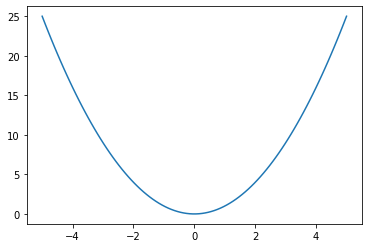

In [46]:
plt.plot(x,y)

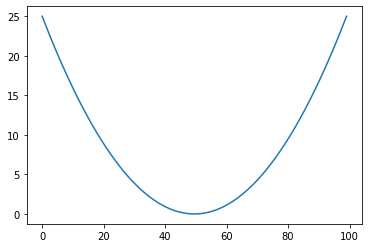

In [47]:
plt.plot(y)

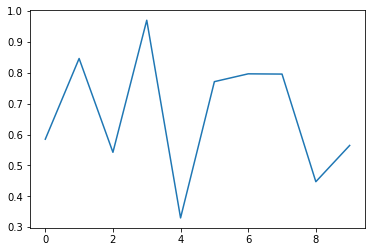

In [49]:
plt.plot(np.random.rand(10))

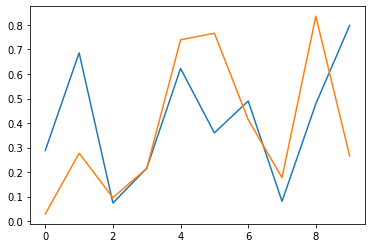

In [50]:
plt.plot(np.random.rand(10))
plt.plot(np.random.rand(10))

Text(0.5, 1.0, 'Title')

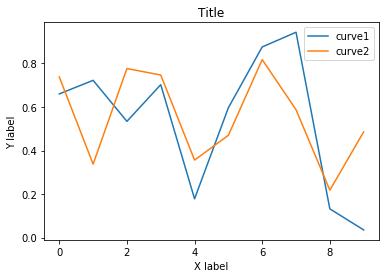

In [51]:
plt.plot(np.random.rand(10))
plt.plot(np.random.rand(10))
plt.legend(["curve1", "curve2"])
plt.xlabel("X label")
plt.ylabel("Y label")
plt.title("Title")